# 資料清理

In [1]:
import yfinance as yf
import pandas as pd
import ta
from ta import add_all_ta_features
from ta.momentum import StochasticOscillator

# 獲取台積電股票的歷史數據
df = yf.Ticker("2357.TW").history(period="max")

# 計算技術指標
df = add_all_ta_features(df, open="Open", high="High", low="Low", close="Close", volume="Volume")

df.info()


C:\Users\Chen1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ta\trend.py:780: RuntimeWarning: invalid value encountered in scalar divide
  dip[idx] = 100 * (self._dip[idx] / value)
C:\Users\Chen1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ta\trend.py:785: RuntimeWarning: invalid value encountered in scalar divide
  din[idx] = 100 * (self._din[idx] / value)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5723 entries, 2000-01-04 00:00:00+08:00 to 2023-06-02 00:00:00+08:00
Data columns (total 93 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Open                       5723 non-null   float64
 1   High                       5723 non-null   float64
 2   Low                        5723 non-null   float64
 3   Close                      5723 non-null   float64
 4   Volume                     5723 non-null   int64  
 5   Dividends                  5723 non-null   float64
 6   Stock Splits               5723 non-null   float64
 7   volume_adi                 5694 non-null   float64
 8   volume_obv                 5723 non-null   int64  
 9   volume_cmf                 5342 non-null   float64
 10  volume_fi                  5710 non-null   float64
 11  volume_em                  5585 non-null   float64
 12  volume_sma_em              4719 non-null   float64
 13  

In [2]:
# 選擇要保留的指標
selected_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'trend_macd_diff', 'trend_ema_fast']

# 刪除其他指標
df = df[selected_columns]

# 打印結果
print(df)

                                 Open        High         Low       Close   
Date                                                                        
2000-01-04 00:00:00+08:00   94.138475   97.737870   92.754097   95.799744  \
2000-01-05 00:00:00+08:00   93.584679   95.245954   93.030938   93.584679   
2000-01-06 00:00:00+08:00   93.861564   95.522845   93.030927   93.307823   
2000-01-07 00:00:00+08:00   92.200305   92.477201   90.815926   91.369667   
2000-01-10 00:00:00+08:00   92.754115   96.907251   92.754115   96.076607   
...                               ...         ...         ...         ...   
2023-05-29 00:00:00+08:00  309.500000  312.000000  303.500000  303.500000   
2023-05-30 00:00:00+08:00  307.500000  307.500000  303.500000  304.000000   
2023-05-31 00:00:00+08:00  304.000000  307.000000  303.000000  305.000000   
2023-06-01 00:00:00+08:00  304.000000  307.000000  301.500000  306.000000   
2023-06-02 00:00:00+08:00  306.000000  316.000000  305.500000  316.000000   

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5723 entries, 2000-01-04 00:00:00+08:00 to 2023-06-02 00:00:00+08:00
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Open             5723 non-null   float64
 1   High             5723 non-null   float64
 2   Low              5723 non-null   float64
 3   Close            5723 non-null   float64
 4   Volume           5723 non-null   int64  
 5   trend_macd_diff  5690 non-null   float64
 6   trend_ema_fast   5712 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 357.7 KB


In [4]:
# 將索引視為日期欄位
df['Date'] = df.index

# 將"Date"欄位移至第一欄
df = df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'trend_macd_diff', 'trend_ema_fast']]


# 計算KD值
KD = ta.momentum.StochasticOscillator(
    close=df['Close'],
    high=df['High'],
    low=df['Low'],
    window=14,
    smooth_window=3,
    fillna=False
)
df['KD'] = KD.stoch()  # 取得KD值的陣列

# 使用ta套件中的RSIIndicator指標計算RSI值
rsi = ta.momentum.RSIIndicator(
    close=df['Close'],
    window=14,
    fillna=False
).rsi()

# 將計算出的RSI值合併到原始DataFrame中
df['RSI'] = rsi

# 過濾出2022年到2023年2月的資料
start_date = '2022-01-01'
end_date = '2023-02-28'
dfmodel = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]




df = df.round(3) 

df = df.reset_index(drop=True)

print(dfmodel)

                                               Date        Open        High   
Date                                                                          
2022-01-03 00:00:00+08:00 2022-01-03 00:00:00+08:00  327.363648  327.797817  \
2022-01-04 00:00:00+08:00 2022-01-04 00:00:00+08:00  325.626970  328.666155   
2022-01-05 00:00:00+08:00 2022-01-05 00:00:00+08:00  327.797816  334.310356   
2022-01-06 00:00:00+08:00 2022-01-06 00:00:00+08:00  328.231981  331.271166   
2022-01-07 00:00:00+08:00 2022-01-07 00:00:00+08:00  331.705345  332.139514   
...                                             ...         ...         ...   
2023-02-20 00:00:00+08:00 2023-02-20 00:00:00+08:00  279.500000  279.500000   
2023-02-21 00:00:00+08:00 2023-02-21 00:00:00+08:00  278.500000  279.500000   
2023-02-22 00:00:00+08:00 2023-02-22 00:00:00+08:00  278.500000  281.000000   
2023-02-23 00:00:00+08:00 2023-02-23 00:00:00+08:00  281.000000  282.000000   
2023-02-24 00:00:00+08:00 2023-02-24 00:00:00+08:00 

In [5]:
dfmodel.tail(60)

,Date,Open,High,Low,Close,Volume,trend_macd_diff,trend_ema_fast,KD,RSI
Date,,,,,,,,,,
2022-11-22 00:00:00+08:00,2022-11-22 00:00:00+08:00,259.0,261.5,255.0,261.0,4098891,2.313383,250.767933,98.437500,72.108387
2022-11-23 00:00:00+08:00,2022-11-23 00:00:00+08:00,261.5,267.0,260.5,265.0,4050592,2.451179,252.957481,94.666667,74.953451
2022-11-24 00:00:00+08:00,2022-11-24 00:00:00+08:00,267.0,270.0,266.0,267.5,3832600,2.536749,255.194792,93.055556,76.562588
2022-11-25 00:00:00+08:00,2022-11-25 00:00:00+08:00,270.0,271.5,265.0,265.0,4341984,2.260228,256.703285,80.000000,71.608174
2022-11-28 00:00:00+08:00,2022-11-28 00:00:00+08:00,263.0,270.0,259.0,265.5,4286710,1.957553,258.056626,80.952381,71.998451
2022-11-29 00:00:00+08:00,2022-11-29 00:00:00+08:00,266.0,270.0,264.0,267.0,3831666,1.713708,259.432530,85.714286,73.189133
2022-11-30 00:00:00+08:00,2022-11-30 00:00:00+08:00,267.0,269.0,265.5,266.0,3737332,1.356070,260.442910,79.629630,71.020961
2022-12-01 00:00:00+08:00,2022-12-01 00:00:00+08:00,270.0,273.5,267.0,271.5,2959974,1.357579,262.144001,92.452830,75.346779
2022-12-02 00:00:00+08:00,2022-12-02 00:00:00+08:00,273.0,277.0,271.0,277.0,3374701,1.581023,264.429539,100.000000,78.761077


# 模型建構

### SVR

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, cross_val_score
import datetime
from dateutil.relativedelta import relativedelta

# SVR
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'trend_macd_diff', 'trend_ema_fast', 'KD', 'RSI']
X = dfmodel[features].shift(-60).dropna()

# Shift the target variable 'Close' 60 trading days ahead
y = dfmodel['Close'].shift(-60).dropna()

ratio_values = [i for i in range(20, 100, 10)]
C_values = [0.1, 1.0, 10.0]
epsilon_values = [0.1, 0.2, 0.5]

best_relative_error = float('inf')
best_params = {}

for ratio in ratio_values:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=ratio/100, random_state=2023, shuffle=False)
    
    # 使用交叉驗證來評估模型性能
    scores = []
    for C in C_values:
        for epsilon in epsilon_values:
            model = SVR(C=C, epsilon=epsilon)
            # 使用交叉驗證計算性能指標
            cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
            avg_score = np.mean(cv_scores)
            scores.append((C, epsilon, avg_score))
    
    # 選擇最佳參數
    best_C, best_epsilon, _ = min(scores, key=lambda x: x[2])
    
    model = SVR(C=best_C, epsilon=best_epsilon)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    epsilon = 0.1
    relative_error = np.mean(np.abs(y_test - y_pred) <= epsilon) * 100
    
    if relative_error < best_relative_error:
        best_relative_error = relative_error
        best_params = {'ratio': ratio, 'C': best_C, 'epsilon': best_epsilon}

print("最佳参数:", best_params)
print("最佳相对误差:", best_relative_error, '%')

# 使用最佳參數進行訓練
model_SVR = SVR(C=best_params['C'], epsilon=best_params['epsilon'])
model_SVR.fit(X, y)


最佳参数: {'ratio': 20, 'C': 0.1, 'epsilon': 0.1}
最佳相对误差: 0.0 %


SVR(C=0.1)

In [7]:
# 將2023年3月到5月之前60天的資料作為輸入值
input_data = dfmodel.loc['2022-11-18':'2023-02-24'][features].tail(62)

# 使用模型進行預測
predictions_SVR = model_SVR.predict(input_data)

# 印出預測結果
print(predictions_SVR)

[270.7263586  270.24729351 269.8289371  269.84524903 269.92387661
 269.75339575 269.76958883 269.92423024 269.96062903 270.29652003
 270.1113361  270.39594108 270.48488284 270.35079099 270.59374005
 270.75473949 270.62642397 270.55802357 270.64708121 270.67482839
 269.54697323 269.51801903 269.60513565 269.51926794 269.51656506
 270.8651105  270.92866258 270.9285992  270.91004926 270.85339974
 270.92809063 270.91231462 270.92844391 270.90000001 270.92777938
 270.84630118 270.68579601 270.83594471 270.81024345 270.90883225
 270.91574041 270.87361832 269.74320162 270.33532741 270.90262176
 270.82853312 270.87579614 270.74793641 270.77699052 270.75824233
 270.88745656 270.37121142 270.82284438 270.90231854 270.89290197
 270.74802765 270.92293107 270.9280005  270.92867387 270.87401611
 270.83076785 270.4947718 ]


In [8]:
# 选择3月到5月的数据
start_date_predict = '2023-03-01'
end_date_predict = '2023-05-31'
selected_data_SVR = df[(df['Date'] >= start_date_predict) & (df['Date'] <= end_date_predict)]

# 只保留日期索引列
selected_data_SVR = selected_data_SVR[['Date']]

selected_data_SVR['predictions_SVR'] = predictions_SVR

# 打印结果
print(selected_data_SVR)




                          Date  predictions_SVR
5659 2023-03-01 00:00:00+08:00       270.726359
5660 2023-03-02 00:00:00+08:00       270.247294
5661 2023-03-03 00:00:00+08:00       269.828937
5662 2023-03-06 00:00:00+08:00       269.845249
5663 2023-03-07 00:00:00+08:00       269.923877
...                        ...              ...
5716 2023-05-25 00:00:00+08:00       270.928000
5717 2023-05-26 00:00:00+08:00       270.928674
5718 2023-05-29 00:00:00+08:00       270.874016
5719 2023-05-30 00:00:00+08:00       270.830768
5720 2023-05-31 00:00:00+08:00       270.494772

[62 rows x 2 columns]


In [9]:
# 找到最低值和最高值的索引
min_index = selected_data_SVR['predictions_SVR'].idxmin()
max_index = selected_data_SVR['predictions_SVR'].idxmax()

# 獲取最低值和最高值的日期
min_date = selected_data_SVR.loc[min_index, 'Date']
max_date = selected_data_SVR.loc[max_index, 'Date']

# 獲取最低值和最高值的實際數值
min_value = selected_data_SVR.loc[min_index, 'predictions_SVR']
max_value = selected_data_SVR.loc[max_index, 'predictions_SVR']

print("最低值日期：", min_date)
print("最低值：", min_value)
print("最高值日期：", max_date)
print("最高值：", max_value)


最低值日期： 2023-04-07 00:00:00+08:00
最低值： 269.5165650610768
最高值日期： 2023-05-26 00:00:00+08:00
最高值： 270.92867386603666


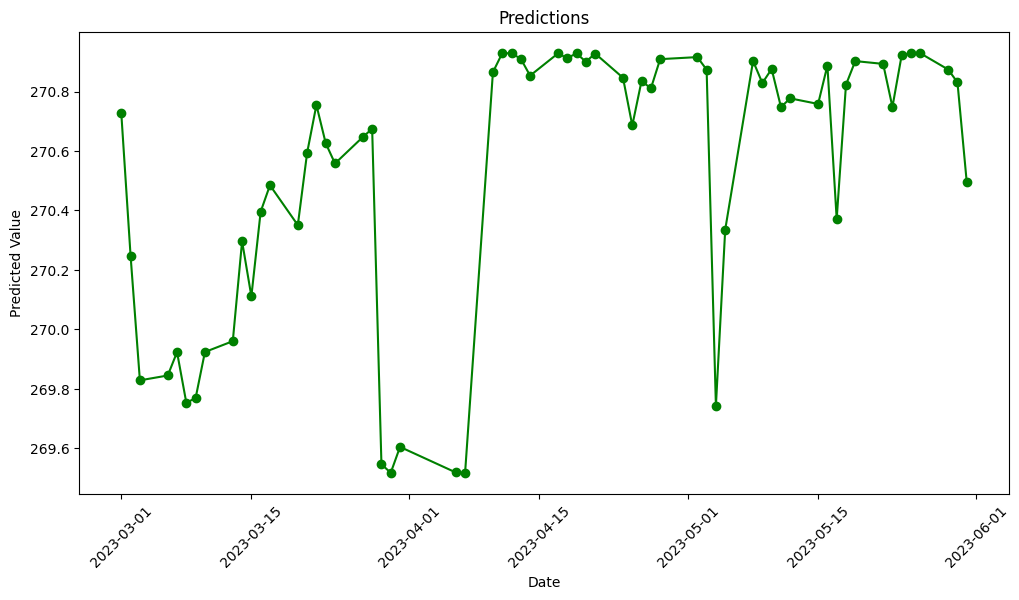

In [10]:
# 设置图形大小
plt.figure(figsize=(12, 6))

# 绘制折线图
plt.plot(selected_data_SVR['Date'], selected_data_SVR['predictions_SVR'], marker='o', color='green')


# 设置标题和坐标轴标签
plt.title('Predictions')
plt.xlabel('Date')
plt.ylabel('Predicted Value')

# 设置x轴刻度的显示方式
plt.xticks(rotation=45)

# 显示图形
plt.show()

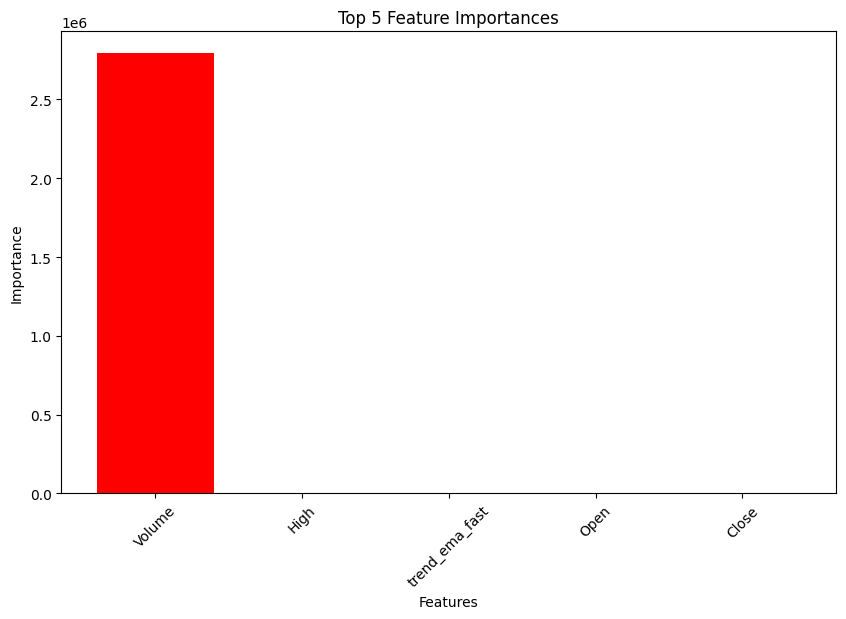

In [11]:
# 獲取支持向量（SV）的索引
support_vector_indices = model_SVR.support_

# 獲取支持向量對應的特徵
support_vectors = X.iloc[support_vector_indices]

# 計算支持向量的平均值作為特徵重要性
feature_importances = support_vectors.mean()

# 將特徵重要性排序
feature_importances_sorted = feature_importances.sort_values(ascending=False)

# 取前N個重要特徵
top_n = 5
top_features = feature_importances_sorted.index[:top_n]
top_importances = feature_importances_sorted.values[:top_n]

# 可視化為長條圖
plt.figure(figsize=(10, 6))
plt.bar(top_features, top_importances, color='red')
plt.title('Top {} Feature Importances'.format(top_n))
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()


### randomforest

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import xgboost
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import datetime
from dateutil.relativedelta import relativedelta

# Random Forest
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'trend_macd_diff', 'trend_ema_fast', 'KD', 'RSI']
X = dfmodel[features].shift(-60).dropna()

# Shift the target variable 'Close' 60 trading days ahead
y = dfmodel['Close'].shift(-60).dropna()

ratio_values = [i for i in range(5, 100, 5)]
n_estimator_values = [i for i in range(100, 250, 50)]
max_depth_values = [i for i in range(1, 5)]
min_samples_leaf_values = [i for i in range(1, 5)]

best_relative_error = float('inf')
best_params = {}

for ratio in ratio_values:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=ratio/100, random_state=2023, shuffle=False)
    for max_depth in max_depth_values:
        for min_samples_leaf in min_samples_leaf_values:
            for n_estimators in n_estimator_values:
                model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=2023)
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)
                mse = mean_squared_error(y_test, y_pred)
                average_value = np.mean(y_test)
                relative_error = (mse / average_value) * 100
                if relative_error < best_relative_error:
                    best_relative_error = relative_error
                    best_params = {'ratio': ratio, 'n_estimators': n_estimators, 'max_depth': max_depth, 'min_samples_leaf': min_samples_leaf}

print("最佳参数:", best_params)
print("最佳相对误差:", best_relative_error,'%')

# 將模型命名為 model
model_RF = RandomForestRegressor(n_estimators=best_params['n_estimators'],
                              max_depth=best_params['max_depth'],
                              min_samples_leaf=best_params['min_samples_leaf'],
                              random_state=2023)
model_RF.fit(X, y)




最佳参数: {'ratio': 95, 'n_estimators': 100, 'max_depth': 4, 'min_samples_leaf': 1}
最佳相对误差: 0.06331092645575889 %


RandomForestRegressor(max_depth=4, random_state=2023)

In [13]:
# 將2023年3月到5月之前60天的資料作為輸入值
input_data = dfmodel.loc['2022-11-15':'2023-02-24'][features].tail(62)

# 使用模型進行預測
predictions_RF = model_RF.predict(input_data)

# 印出預測結果
print(predictions_RF)

[255.60417078 257.75302188 260.50797525 265.56190935 267.66247447
 265.61138851 265.60207902 267.14017185 266.09435652 270.97766889
 277.41240571 282.9176065  278.49461986 271.34548953 268.15548128
 268.92197555 271.9839768  267.66247447 272.0926998  267.18417356
 265.60207902 265.24831012 269.07936273 266.00087565 275.69294134
 270.85349952 271.34548953 269.8257834  269.07936273 269.03536102
 268.92197555 269.78776177 268.92197555 270.85349952 270.97766889
 274.97352124 269.40025266 269.07936273 265.56190935 268.11745965
 269.07936273 268.11745965 279.49056317 271.46648269 275.03381768
 278.62274988 278.49461986 277.17811814 278.49461986 278.49461986
 277.31972598 269.8257834  273.96693648 277.52175324 277.31972598
 278.49461986 279.3873386  278.49461986 279.3873386  279.3873386
 280.52659938 278.49461986]


In [14]:
# 选择3月到5月的数据
start_date_predict = '2023-03-01'
end_date_predict = '2023-05-31'
selected_data_RF = df[(df['Date'] >= start_date_predict) & (df['Date'] <= end_date_predict)]

# 只保留日期索引列
selected_data_RF = selected_data_RF[['Date']]

selected_data_RF['predictions_RF'] = predictions_RF

# 打印结果
print(selected_data_RF)


                          Date  predictions_RF
5659 2023-03-01 00:00:00+08:00      255.604171
5660 2023-03-02 00:00:00+08:00      257.753022
5661 2023-03-03 00:00:00+08:00      260.507975
5662 2023-03-06 00:00:00+08:00      265.561909
5663 2023-03-07 00:00:00+08:00      267.662474
...                        ...             ...
5716 2023-05-25 00:00:00+08:00      278.494620
5717 2023-05-26 00:00:00+08:00      279.387339
5718 2023-05-29 00:00:00+08:00      279.387339
5719 2023-05-30 00:00:00+08:00      280.526599
5720 2023-05-31 00:00:00+08:00      278.494620

[62 rows x 2 columns]


In [15]:
# 找到最低值和最高值的索引
min_index = selected_data_RF['predictions_RF'].idxmin()
max_index = selected_data_RF['predictions_RF'].idxmax()

# 獲取最低值和最高值的日期
min_date = selected_data_RF.loc[min_index, 'Date']
max_date = selected_data_RF.loc[max_index, 'Date']

# 獲取最低值和最高值的實際數值
min_value = selected_data_RF.loc[min_index, 'predictions_RF']
max_value = selected_data_RF.loc[max_index, 'predictions_RF']

print("最低值日期：", min_date)
print("最低值：", min_value)
print("最高值日期：", max_date)
print("最高值：", max_value)

最低值日期： 2023-03-01 00:00:00+08:00
最低值： 255.60417078074295
最高值日期： 2023-03-16 00:00:00+08:00
最高值： 282.9176065009941


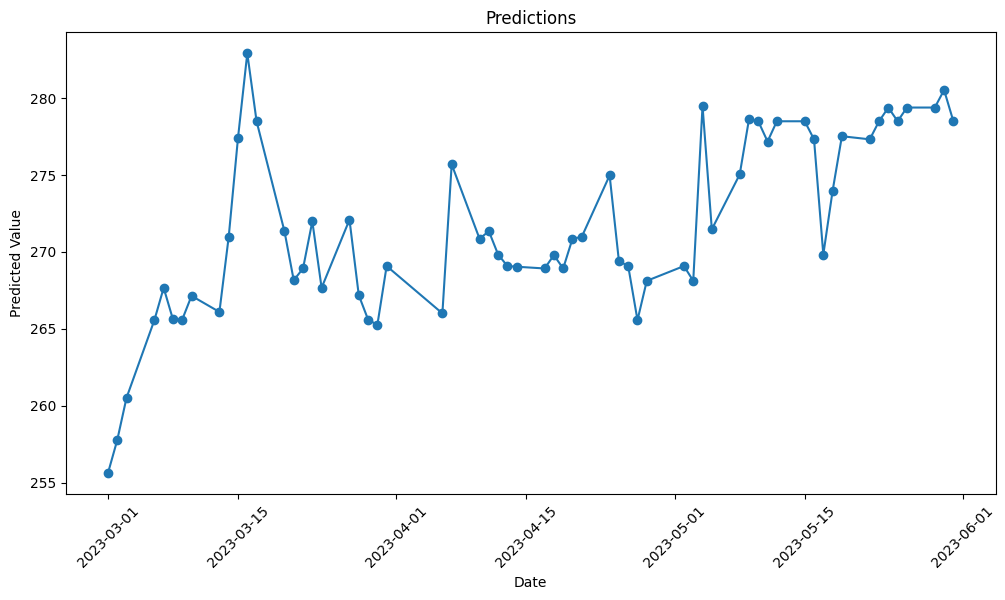

In [16]:
# 设置图形大小
plt.figure(figsize=(12, 6))

# 绘制折线图
plt.plot(selected_data_RF['Date'], selected_data_RF['predictions_RF'], marker='o')

# 设置标题和坐标轴标签
plt.title('Predictions')
plt.xlabel('Date')
plt.ylabel('Predicted Value')

# 设置x轴刻度的显示方式
plt.xticks(rotation=45)

# 显示图形
plt.show()



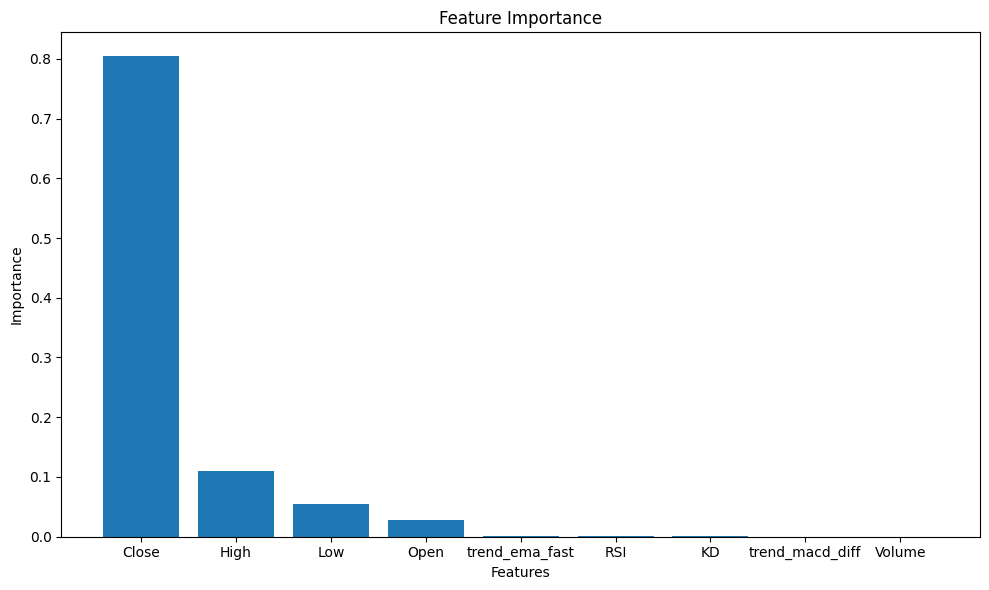

In [17]:
#看那些特徵比較重要，然後輸出前n重要的特徵

feature_importances = model_RF.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# 繪製長條圖
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances, align='center')
plt.xticks(range(len(sorted_feature_importances)), sorted_feature_names,)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

### XGBoost

In [18]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
import datetime
from dateutil.relativedelta import relativedelta


# XGBoost
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'trend_macd_diff', 'trend_ema_fast', 'KD', 'RSI']
X = dfmodel[features].shift(-60).dropna()

# Shift the target variable 'Close' 60 trading days ahead
y = dfmodel['Close'].shift(-60).dropna()

ratio_values = [i for i in range(20, 100, 10)]

best_relative_error = float('inf')
best_params = {}

for ratio in ratio_values:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=ratio/100, random_state=2023, shuffle=False)
    
    # 使用交叉驗證來評估模型性能
    scores = []
    for max_depth in range(3, 7):
        for learning_rate in [0.1, 0.01]:
            model = xgb.XGBRegressor(max_depth=max_depth, learning_rate=learning_rate)
            # 使用交叉驗證計算性能指標
            cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
            avg_score = np.mean(cv_scores)
            scores.append((max_depth, learning_rate, avg_score))
    
    # 選擇最佳參數
    best_max_depth, best_learning_rate, _ = min(scores, key=lambda x: x[2])
    
    model = xgb.XGBRegressor(max_depth=best_max_depth, learning_rate=best_learning_rate)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    epsilon = 0.00001
    relative_error = np.mean(np.abs(y_test - y_pred) <= epsilon) * 100
    
    if relative_error < best_relative_error:
        best_relative_error = relative_error
        best_params = {'ratio': ratio, 'max_depth': best_max_depth, 'learning_rate': best_learning_rate}

print("最佳參數:", best_params)
print("最佳相對誤差:", best_relative_error, '%')

# 使用最佳參數進行訓練
model_XG = xgb.XGBRegressor(max_depth=best_params['max_depth'], learning_rate=best_params['learning_rate'])
model_XG.fit(X, y)

最佳參數: {'ratio': 20, 'max_depth': 3, 'learning_rate': 0.01}
最佳相對誤差: 0.0 %


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [19]:
# 將2023年3月到5月之前60天的資料作為輸入值
input_data = dfmodel.loc['2022-11-18':'2023-02-24'][features].tail(62)

# 使用模型進行預測
predictions_XG = model_XG.predict(input_data)

# 印出預測結果
print(predictions_XG)

[161.94589 163.4955  165.96379 168.86227 170.49728 168.86227 169.09557
 170.20241 169.40755 172.46075 176.57208 178.30493 176.79819 172.65358
 170.74832 170.95955 173.4684  170.49728 173.4684  170.20241 169.09557
 168.32788 170.95955 169.40755 175.45987 172.1825  172.65358 171.39975
 170.95955 170.95955 170.95955 171.39975 170.95955 172.1825  172.46075
 175.21849 171.13576 170.95955 168.86227 170.74832 170.95955 170.74832
 177.90318 172.65358 175.21849 177.0069  176.79819 175.88045 176.79819
 176.79819 175.88045 171.39975 174.72806 176.3452  175.88045 176.79819
 177.6831  176.79819 177.6831  177.6831  178.10727 176.79819]


In [20]:
# 选择3月到5月的数据
start_date_predict = '2023-03-01'
end_date_predict = '2023-05-31'
selected_data_XG = df[(df['Date'] >= start_date_predict) & (df['Date'] <= end_date_predict)]

# 只保留日期索引列
selected_data_XG = selected_data_XG[['Date']]

selected_data_XG['predictions_XG'] = predictions_XG

# 打印结果
print(selected_data_XG)




                          Date  predictions_XG
5659 2023-03-01 00:00:00+08:00      161.945892
5660 2023-03-02 00:00:00+08:00      163.495499
5661 2023-03-03 00:00:00+08:00      165.963791
5662 2023-03-06 00:00:00+08:00      168.862274
5663 2023-03-07 00:00:00+08:00      170.497284
...                        ...             ...
5716 2023-05-25 00:00:00+08:00      176.798187
5717 2023-05-26 00:00:00+08:00      177.683105
5718 2023-05-29 00:00:00+08:00      177.683105
5719 2023-05-30 00:00:00+08:00      178.107269
5720 2023-05-31 00:00:00+08:00      176.798187

[62 rows x 2 columns]


In [21]:
# 找到最低值和最高值的索引
min_index = selected_data_XG['predictions_XG'].idxmin()
max_index = selected_data_XG['predictions_XG'].idxmax()

# 獲取最低值和最高值的日期
min_date = selected_data_XG.loc[min_index, 'Date']
max_date = selected_data_XG.loc[max_index, 'Date']

# 獲取最低值和最高值的實際數值
min_value = selected_data_XG.loc[min_index, 'predictions_XG']
max_value = selected_data_XG.loc[max_index, 'predictions_XG']

print("最低值日期：", min_date)
print("最低值：", min_value)
print("最高值日期：", max_date)
print("最高值：", max_value)


最低值日期： 2023-03-01 00:00:00+08:00
最低值： 161.94589
最高值日期： 2023-03-16 00:00:00+08:00
最高值： 178.30493


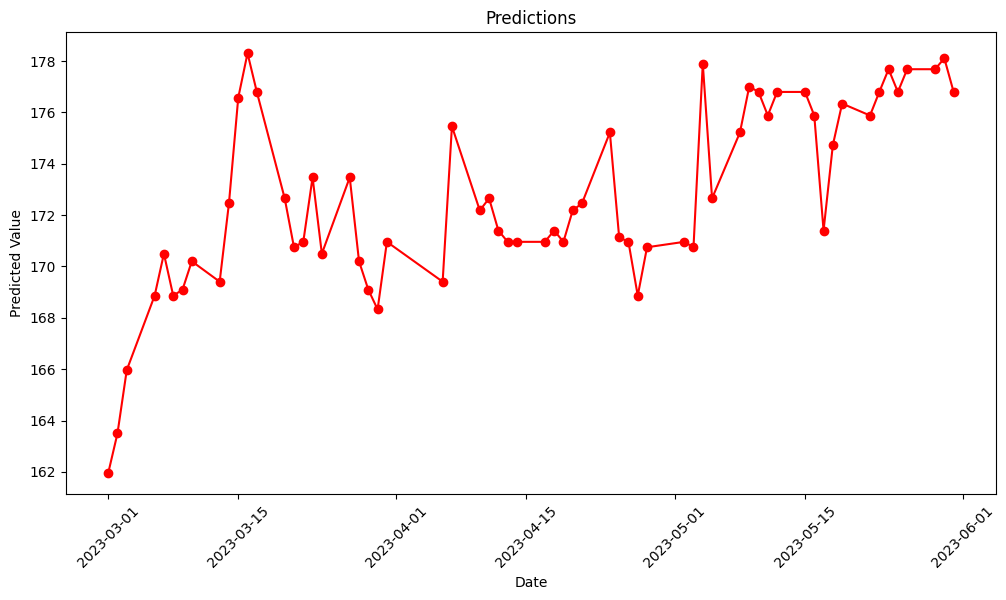

In [22]:
# 设置图形大小
plt.figure(figsize=(12, 6))

# 绘制折线图
plt.plot(selected_data_XG['Date'], selected_data_XG['predictions_XG'], marker='o', color='red')


# 设置标题和坐标轴标签
plt.title('Predictions')
plt.xlabel('Date')
plt.ylabel('Predicted Value')

# 设置x轴刻度的显示方式
plt.xticks(rotation=45)

# 显示图形
plt.show()



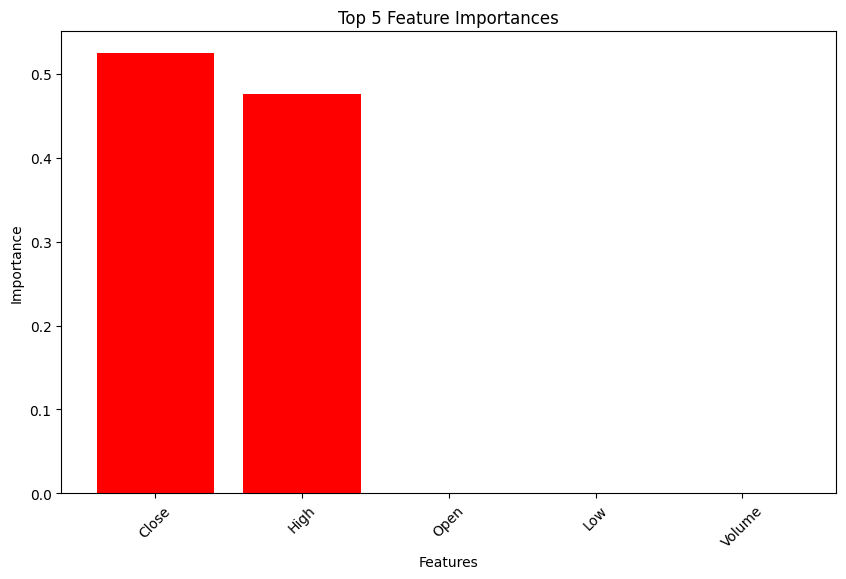

In [23]:
# 獲取特徵重要性
feature_importances = model_XG.feature_importances_

# 獲取特徵名稱
feature_names = X.columns

# 將特徵重要性與特徵名稱進行配對並排序
feature_importances_sorted = sorted(zip(feature_names, feature_importances), key=lambda x: x[1], reverse=True)

# 取前N個重要特徵
top_n = 5
top_features = [f for f, _ in feature_importances_sorted[:top_n]]
top_importances = [imp for _, imp in feature_importances_sorted[:top_n]]

# 可視化為長條圖
plt.figure(figsize=(10, 6))
plt.bar(top_features, top_importances, color='red')
plt.title('Top {} Feature Importances'.format(top_n))
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()


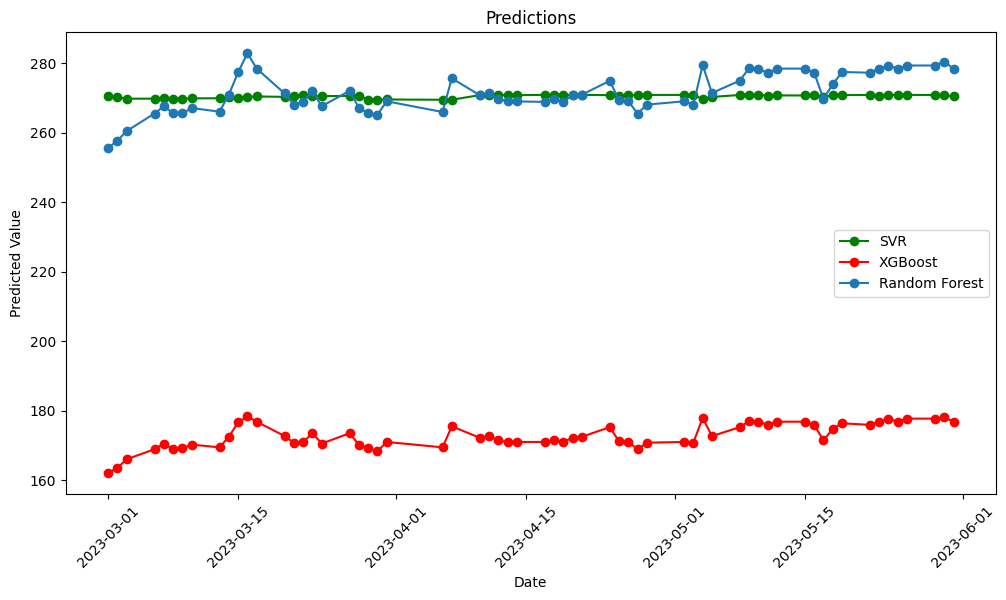

In [24]:
# 设置图形大小
plt.figure(figsize=(12, 6))

# 绘制折线图
plt.plot(selected_data_SVR['Date'], selected_data_SVR['predictions_SVR'], marker='o', color='green', label='SVR')
plt.plot(selected_data_XG['Date'], selected_data_XG['predictions_XG'], marker='o', color='red', label='XGBoost')
plt.plot(selected_data_RF['Date'], selected_data_RF['predictions_RF'], marker='o', label='Random Forest')

# 设置标题和坐标轴标签
plt.title('Predictions')
plt.xlabel('Date')
plt.ylabel('Predicted Value')

# 设置图例
plt.legend()

# 设置x轴刻度的显示方式
plt.xticks(rotation=45)

# 显示图形
plt.show()
